In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv
/kaggle/input/crime-cast-forecasting-crime-categories/train.csv
/kaggle/input/crime-cast-forecasting-crime-categories/test.csv


# Importing Necessary Libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score,cross_validate,ShuffleSplit
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,LabelEncoder,OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.feature_selection import SelectKBest,RFE,SelectFromModel,mutual_info_classif


In [3]:
import warnings
warnings.filterwarnings('ignore')

# Loading the train and test datasets.

In [4]:
train_given=pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/train.csv')
test_given=pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/test.csv')

# Exploring the Dataset.

In [5]:
#Shape of the train dataset and test dataset
print('Train dataset shape:',train_given.shape)
print('Test dataset shape:',test_given.shape)
print('Train dataset columns:',train_given.columns)

Train dataset shape: (20000, 22)
Test dataset shape: (5000, 21)
Train dataset columns: Index(['Location', 'Cross_Street', 'Latitude', 'Longitude', 'Date_Reported',
       'Date_Occurred', 'Time_Occurred', 'Area_ID', 'Area_Name',
       'Reporting_District_no', 'Part 1-2', 'Modus_Operandi', 'Victim_Age',
       'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Premise_Description',
       'Weapon_Used_Code', 'Weapon_Description', 'Status',
       'Status_Description', 'Crime_Category'],
      dtype='object')


In [6]:
#Checking first 5 rows of train.csv data.
train_given.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [7]:
test_given.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description
0,1500 LEIGHTON AV,NaN,34.0128,-118.3045,03/03/2020 12:00:00 AM,03/03/2020 12:00:00 AM,2000.0,3.0,Southwest,376.0,...,0416 1241 1243 1813 1821 2000,28.0,F,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont
1,100 S NORMANDIE AV,NaN,34.0726,-118.3029,06/01/2020 12:00:00 AM,04/25/2020 12:00:00 AM,1700.0,20.0,Olympic,2014.0,...,0344 0394,26.0,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont
2,300 E 111TH ST,NaN,33.9348,-118.2695,08/28/2020 12:00:00 AM,08/27/2020 12:00:00 AM,900.0,18.0,Southeast,1844.0,...,1822 0701 1914 0355 1202 0100,62.0,F,B,721.0,HIGH SCHOOL,NaN,NaN,IC,Invest Cont
3,1300 S LA BREA AV,NaN,34.0497,-118.3442,12/23/2020 12:00:00 AM,12/03/2020 12:00:00 AM,2200.0,7.0,Wilshire,765.0,...,NaN,0.0,NaN,NaN,108.0,PARKING LOT,NaN,NaN,IC,Invest Cont
4,11000 MORRISON ST,NaN,34.1611,-118.3704,08/30/2020 12:00:00 AM,08/29/2020 12:00:00 AM,130.0,15.0,N Hollywood,1555.0,...,1501,37.0,F,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AO,Adult Other


In [8]:
print(train_given.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

# Adding new columns by extracting year, month, day from the Date_Occurred,Date_Reported columns.

In [9]:
#define a function to extract day, Month, Year from Date columns and delete the date columns from the train and test data.
def add_features(X):
    X['Date_Occurred']=pd.to_datetime(X['Date_Occurred'])
    X['Date_Reported']=pd.to_datetime(X['Date_Reported'])
    X['Date_Occurred_Month']=X['Date_Occurred'].dt.month
    X['Date_Occurred_day']=X['Date_Occurred'].dt.day
    X['Date_Reported_Year']=X['Date_Reported'].dt.year
    X['Date_Reported_Month']=X['Date_Reported'].dt.month
    X['Date_Reported_day']=X['Date_Reported'].dt.day
    return X.drop(columns=['Date_Occurred','Date_Reported'],axis=1)
train_data=add_features(train_given)
test_data=add_features(test_given)

# Exploratory Data Analysis.

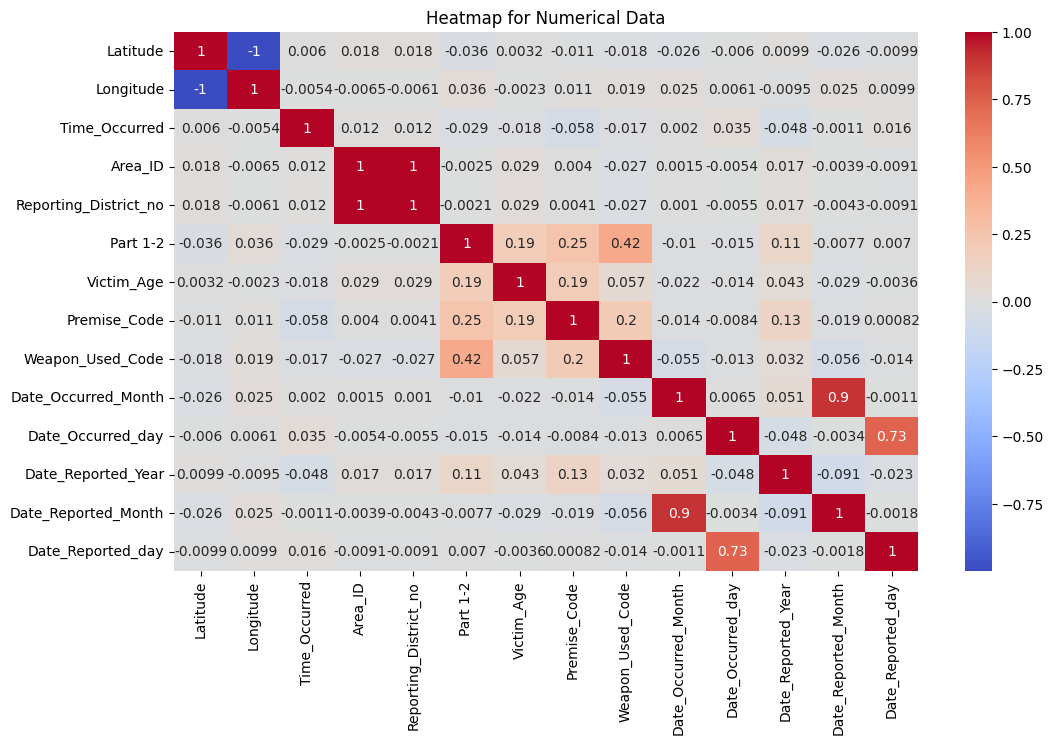

In [10]:
#Plotting heatmap to visualize the numerical features
numerical_columns=train_given.select_dtypes(include=['number'])#Getting all numerical features

correlation_matrix=numerical_columns.corr()
plt.figure(figsize=(12,7))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Heatmap for Numerical Data')
plt.show()

# Insights:
*  **Latitude and longitude are both strongly negatively correlated.**
 
*  **Reporting_District_no and Area_ID are both strongly positively correlated.**
 
*  **Similarly, Date_Occurred_Month and Date_Reported_Month,Date_Occurred_day and Date_Reported_day are correlated with each other.**

# Univariate Analysis

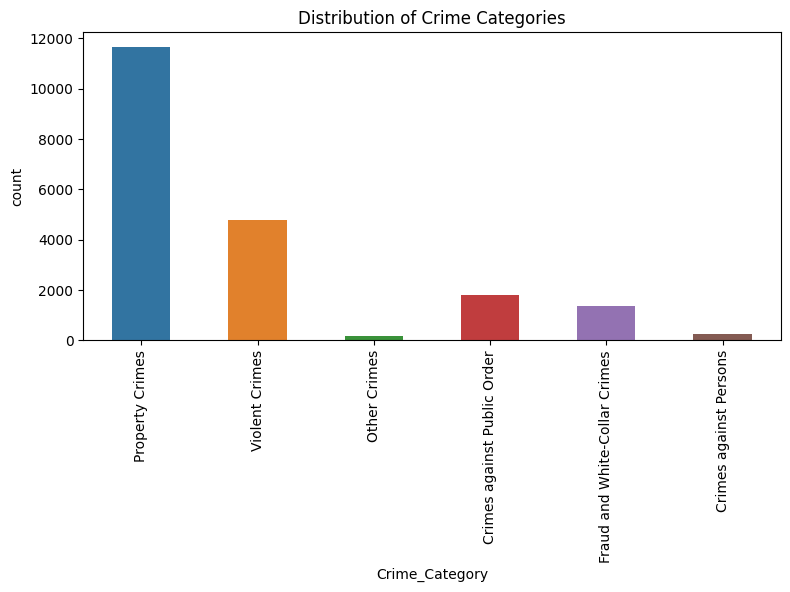

In [11]:
#Crime_Category Distribution count
plt.figure(figsize=(9,4))
sns.countplot(x='Crime_Category',data=train_given,width=0.5)
plt.xticks(rotation=90)
plt.title('Distribution of Crime Categories')
plt.show()

*  **"Other Crimes" and "Crimes against Persons" are very infrequent in the crime_category target. Most of the crimes fall under "Property Crimes."**
* **The Distribution of the Crime_Category is skewed towards Property crimes.** 

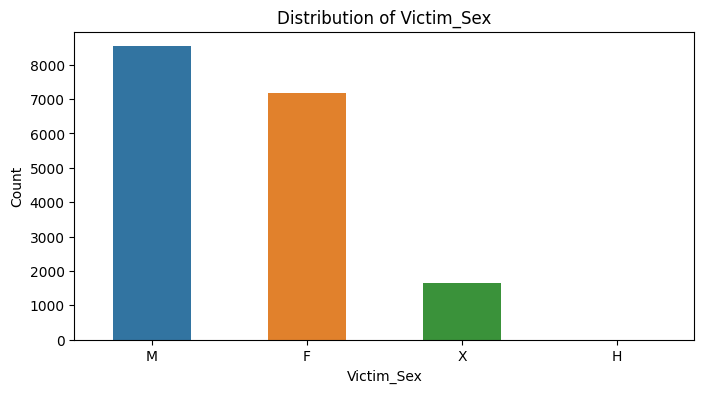

In [12]:
# let's see the distribution of Victim_Sex.
data=train_given['Victim_Sex'].value_counts().reset_index()
data.columns=['Victim_Sex','Count']
plt.figure(figsize=(8,4))
sns.barplot(x='Victim_Sex',y='Count',data=data,width=0.5)
plt.title('Distribution of Victim_Sex')
plt.show()

* **From the Distribution the Victim_Sex we can observe that most of crime incidents are occurring due to Males.**

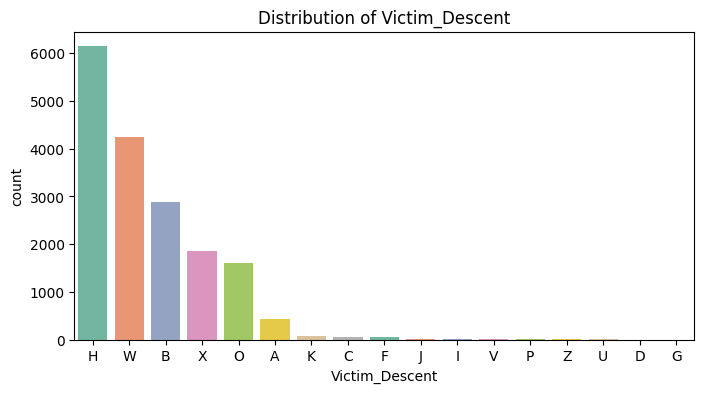

In [13]:
# Distribution of Victim_Descent.
plt.figure(figsize=(8,4))
sns.countplot(x='Victim_Descent',data=train_given,order=train_given['Victim_Descent'].value_counts().index,palette='Set2')
plt.title('Distribution of Victim_Descent')
plt.show()

*  **Distribution of the Victim_Decesent says that Descent code of H persons are involving more number of crimes.**

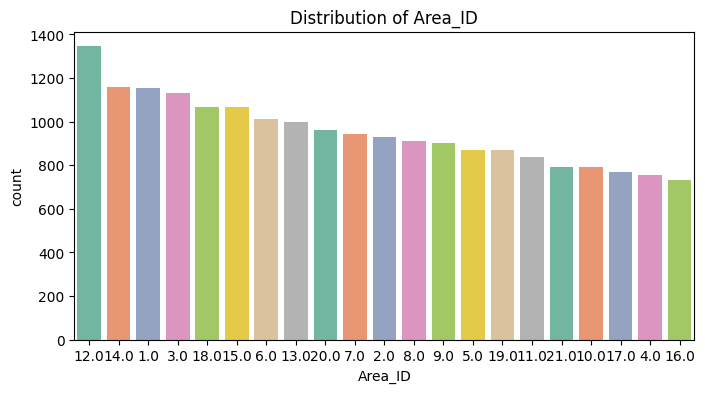

In [14]:
# Distribution of Area_ID.
plt.figure(figsize=(8,4))
sns.countplot(x='Area_ID',data=train_given,order=train_given['Area_ID'].value_counts().index,palette='Set2')
plt.title('Distribution of Area_ID')
plt.show()

* **Allmost in all areas crimes are high but from Area_ID of 12 have more no.of crime incidents.**

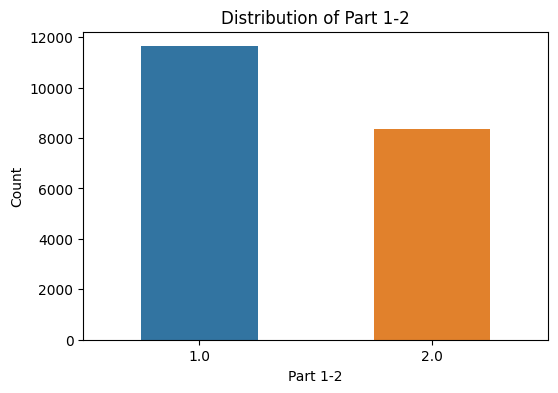

In [15]:
# Distribution of Part 1-2
data=train_given['Part 1-2'].value_counts().reset_index()
data.columns=['Part 1-2','Count']
plt.figure(figsize=(6,4))
sns.barplot(x='Part 1-2',y='Count',data=data,width=0.5)
plt.title('Distribution of Part 1-2')
plt.show()

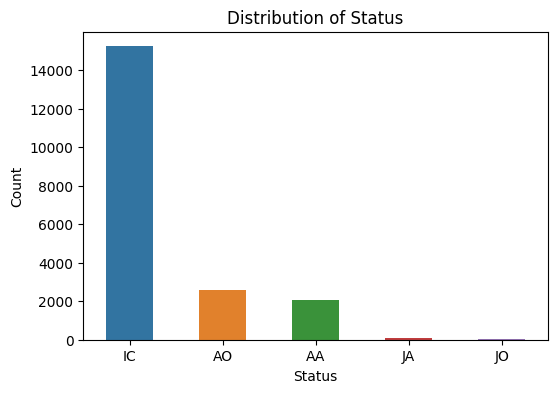

In [16]:
# Distribution of Status
data=train_given['Status'].value_counts().reset_index()
data.columns=['Status','Count']
plt.figure(figsize=(6,4))
sns.barplot(x='Status',y='Count',data=data,width=0.5)
plt.title('Distribution of Status')
plt.show()

* **From the Distribution of status says that most of the crime incidents status was crime-invest cases.**

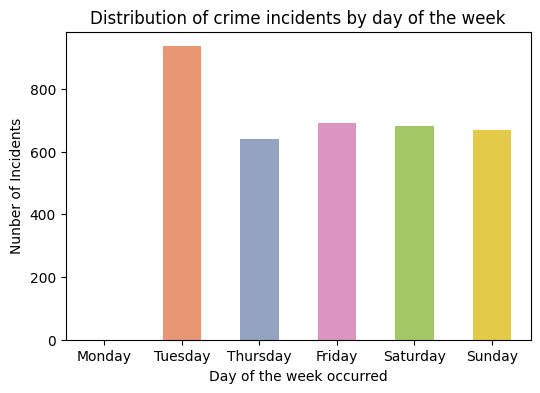

In [17]:
#Distribution of Crime Incidents across Days.
weekday=pd.DataFrame()
day_of_week_mapping={0:"Monday",1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
weekday['Day']=train_given['Date_Occurred_day'].map(day_of_week_mapping)
#plot number of crimes by day of the week
plt.figure(figsize=(6,4))
sns.countplot(x='Day',data=weekday,order=['Monday','Tuesday','Thursday','Friday','Saturday','Sunday'],palette='Set2',width=0.5)
plt.title('Distribution of crime incidents by day of the week')
plt.xlabel('Day of the week occurred')
plt.ylabel('Nunber of Incidents')
plt.show()

* **On Mondays there was no crime incident occured. On Tuesdays high number of the crime incidents was occurred.**

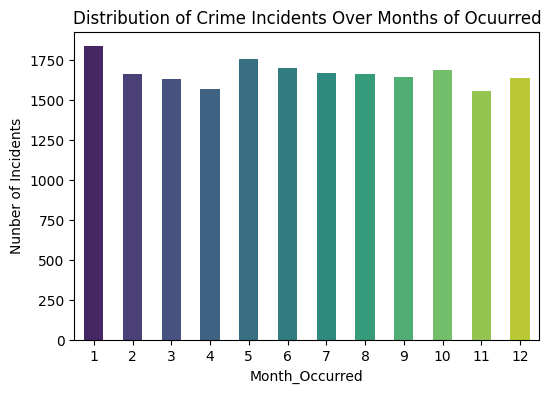

In [18]:
# Plot number of crime incidents occurred by month.
plt.figure(figsize=(6,4))
sns.countplot(x='Date_Occurred_Month',data=train_data,palette='viridis',width=0.5)
plt.title('Distribution of Crime Incidents Over Months of Ocuurred')
plt.xlabel('Month_Occurred')
plt.ylabel('Nunber of Incidents')
plt.show()

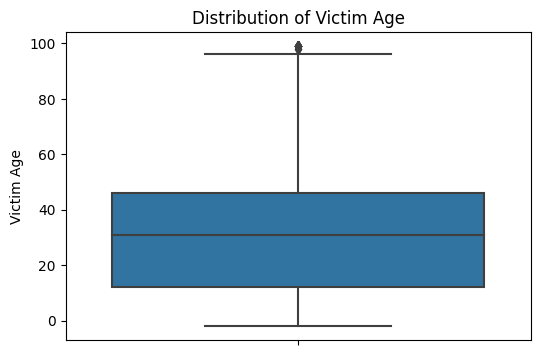

In [19]:
plt.figure(figsize=(6, 4))
sns.boxplot(y='Victim_Age', data=train_given)
plt.title('Distribution of Victim Age')
plt.ylabel('Victim Age')
plt.show()

* **from the above boxplot of Victim_Age feature, it has outliers means some persons age was different from the all others Age.**

# Bivariate Analysis

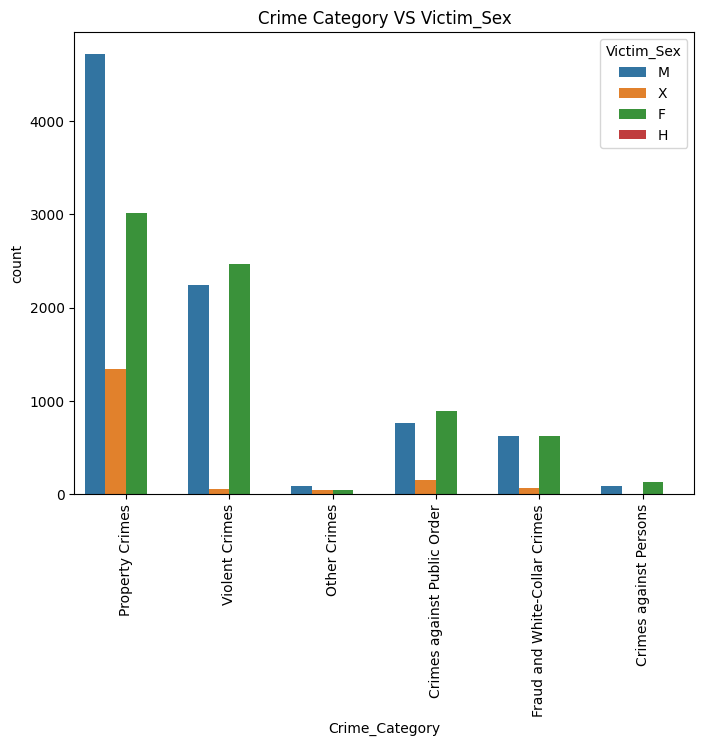

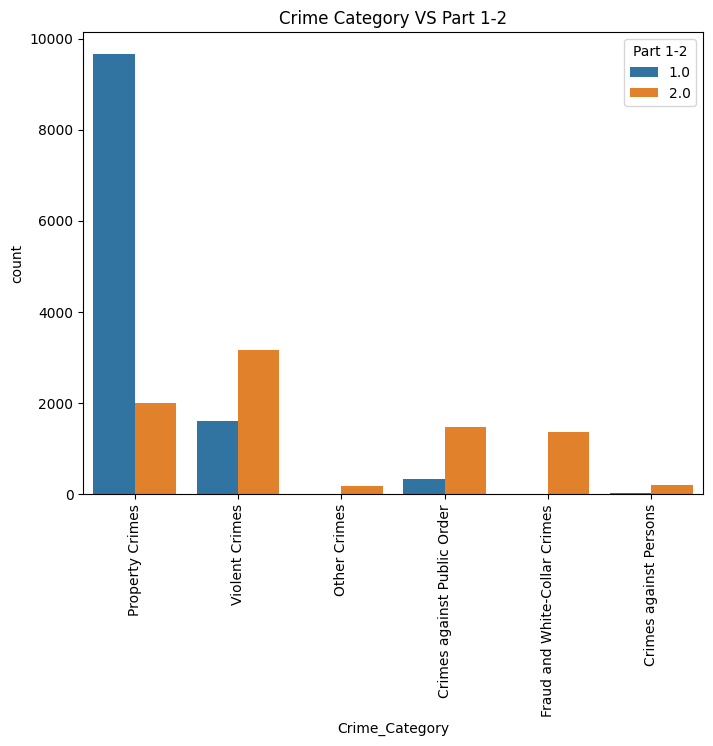

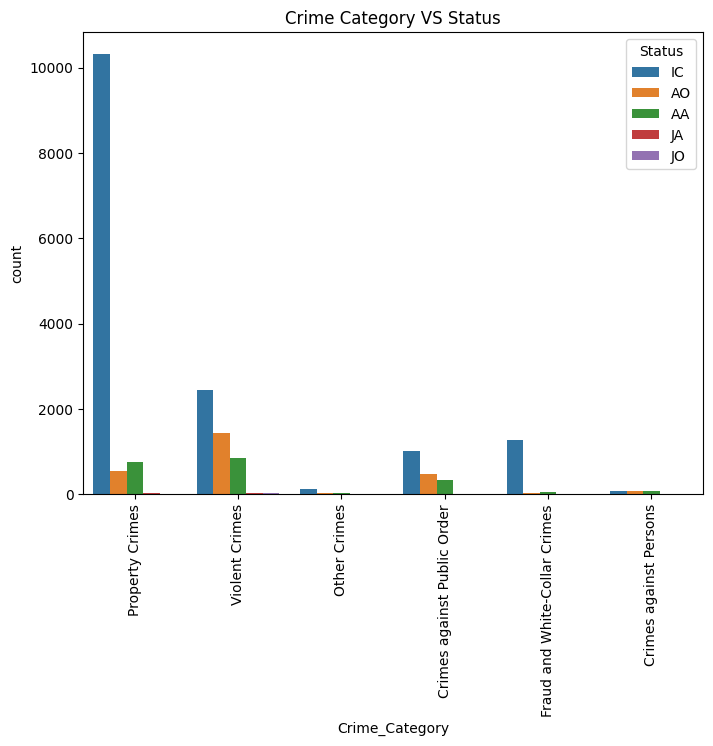

In [20]:
#Checking how the categorical features are related with the target variable.
categorical_features=['Victim_Sex','Part 1-2','Status']
for feature in categorical_features:
    plt.figure(figsize=(8,6))
    sns.countplot(x='Crime_Category',hue=feature,data=train_data)
    plt.title(f'Crime Category VS {feature}')
    plt.xticks(rotation=90)
    plt.show()

# Insights:
 **Males are more often victims of property crimes, while females are more often victims of other types of crimes.**
 
 **Based on the crime category vs. part 1-2 data, it is observed that most property crimes are classified as class-1 crimes, while in all other categories of crimes, class-2 crimes are dominating.**
 
 **From the crime category vs. status data, it is observed that in each category of crimes, the status of crimes is predominantly "investigation."**

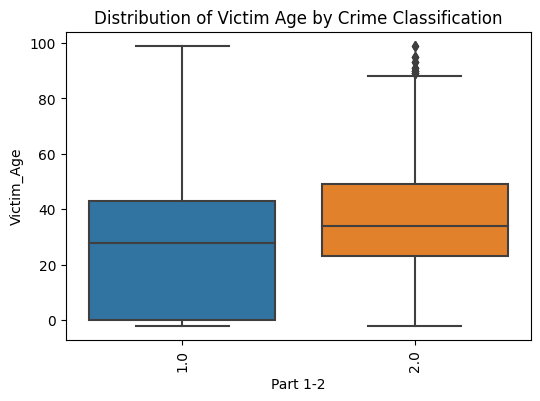

In [21]:
# Boxplot for Victim Age by Crime Classification
plt.figure(figsize=(6, 4))
sns.boxplot(x='Part 1-2', y='Victim_Age', data=train_given)
plt.title('Distribution of Victim Age by Crime Classification')
plt.xticks(rotation=90)
plt.show()

* **"The boxplot of Victim_Age by Part 1-2 reveals that there are some outliers in the age distribution of victims. Specifically, these outliers are individuals who are older than the majority of victims. It appears that crimes classified under Part 1-2 (e.g., Class-2 crimes) tend to include these older victims.**

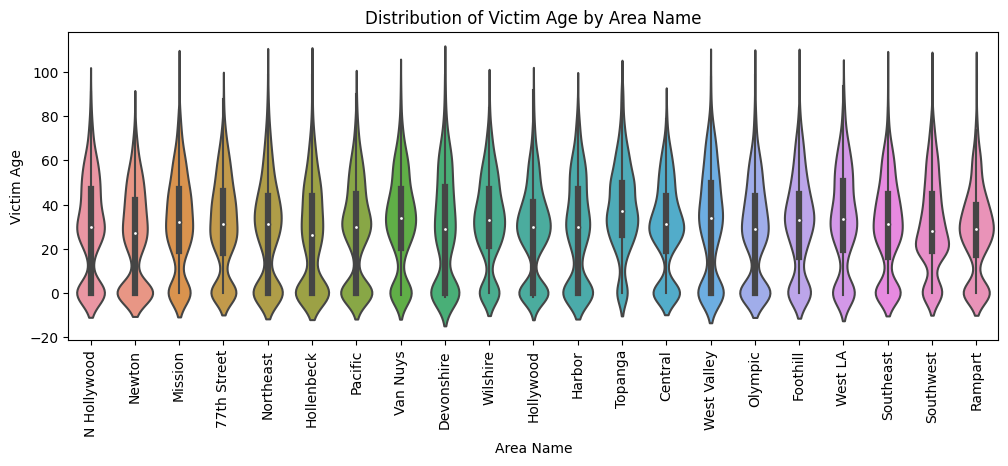

In [22]:
# Violin plot for Victim Age by Area Name
plt.figure(figsize=(12, 4))
sns.violinplot(x='Area_Name',y='Victim_Age',data=train_given)
plt.title('Distribution of Victim Age by Area Name')
plt.xlabel('Area Name')
plt.ylabel('Victim Age')
plt.xticks(rotation=90)
plt.show()

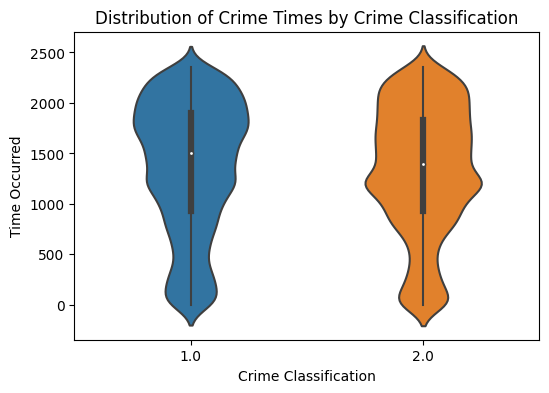

In [23]:
# Violin plot for Time Occurred by Crime Classification
plt.figure(figsize=(6, 4))
sns.violinplot(x='Part 1-2', y='Time_Occurred', data=train_given,width=0.5)
plt.title('Distribution of Crime Times by Crime Classification')
plt.xlabel('Crime Classification')
plt.ylabel('Time Occurred')
plt.show()

* **From the Distribution of Crime times by Crime classification, both class-1 and 2 crimes are low at the starting of the day time and high at the end of the day time.**

<Figure size 400x400 with 0 Axes>

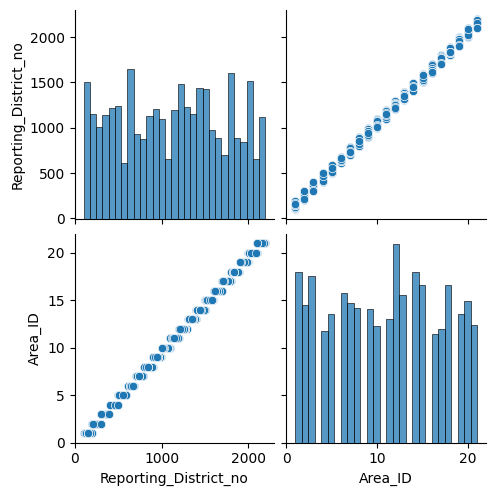

In [24]:
plt.figure(figsize=(4,4))
sns.pairplot(train_given[['Reporting_District_no','Area_ID']])
plt.show()

* **Reporting_District_no and Area_ID are linearly related with eachother.**

In [25]:
from wordcloud import WordCloud, STOPWORDS
text = ' '.join(train_given['Location'].astype(str))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      stopwords=stopwords,
                      colormap='viridis').generate(text)

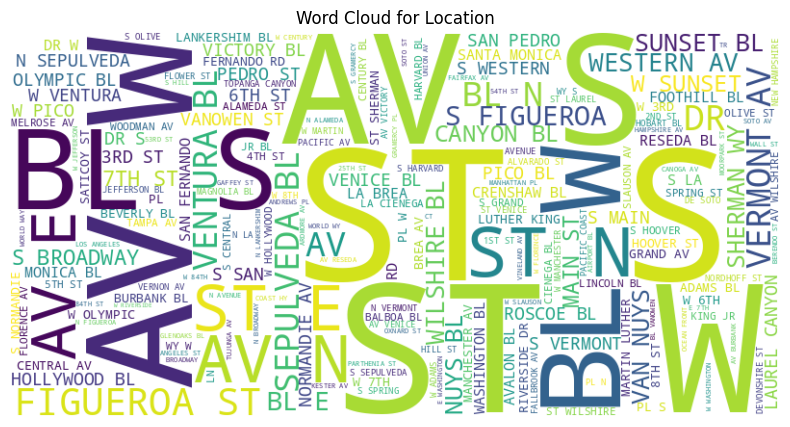

In [26]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.title('Word Cloud for Location')
plt.show()

In [27]:
train_data.describe(include=['object'])

,Location,Cross_Street,Area_Name,Modus_Operandi,Victim_Sex,Victim_Descent,Premise_Description,Weapon_Description,Status,Status_Description,Crime_Category
count,20000,3448,20000,17259,17376,17376,19995,7335,20000,20000,20000
unique,12399,1495,21,10489,4,17,216,57,5,5,6
top,6TH,BROADWAY,77th Street,0344,M,H,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
freq,33,56,1345,826,8538,6143,5033,3990,15236,15236,11666


In [28]:
#To know the Descriptive Statistics of the float datatype features.
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,20000.0,33.940704,2.126810,0.0000,34.0092,34.0587,34.165025,34.3281
Longitude,20000.0,-117.893072,7.377726,-118.6634,-118.4297,-118.3230,-118.274400,0.0000
Time_Occurred,20000.0,1352.380350,646.100291,1.0000,930.0000,1430.0000,1900.000000,2359.0000
Area_ID,20000.0,10.834250,6.033166,1.0000,6.0000,11.0000,16.000000,21.0000
Reporting_District_no,20000.0,1129.599200,603.330519,101.0000,632.0000,1162.0000,1622.000000,2197.0000
Part 1-2,20000.0,1.418150,0.493267,1.0000,1.0000,1.0000,2.000000,2.0000
Victim_Age,20000.0,30.135000,21.863645,-2.0000,12.0000,31.0000,46.000000,99.0000
Premise_Code,20000.0,297.176950,212.007298,101.0000,101.0000,203.0000,501.000000,969.0000
Weapon_Used_Code,7335.0,366.405044,120.485687,101.0000,312.0000,400.0000,400.000000,515.0000
Date_Occurred_Month,20000.0,6.432300,3.459164,1.0000,3.0000,6.0000,9.000000,12.0000


 **From the above descriptive stats it is obeserved that Victim_Age column has zero and negative values but zero and negative age is not meaningful. So, zero and negative age was considered as the null values.**

## Data Preprocessing

In [29]:
#Replacing zero and negative ages with null values.
train_data['Victim_Age'].loc[train_given['Victim_Age']<=0]=np.nan
test_data['Victim_Age'].loc[test_given['Victim_Age']<=0]=np.nan

In [30]:
Missing_values_Percentage=(train_given['Cross_Street'].isin([np.nan]).sum())/len(train_given)
print(f'Cross_Street feature has {Missing_values_Percentage*100}% of Missing Values.')

Cross_Street feature has 82.76% of Missing Values.


In [31]:
train_data.nunique()

Location                 12399
Cross_Street              1495
Latitude                  3622
Longitude                 3578
Time_Occurred              996
Area_ID                     21
Area_Name                   21
Reporting_District_no     1120
Part 1-2                     2
Modus_Operandi           10489
Victim_Age                  97
Victim_Sex                   4
Victim_Descent              17
Premise_Code               217
Premise_Description        216
Weapon_Used_Code            57
Weapon_Description          57
Status                       5
Status_Description           5
Crime_Category               6
Date_Occurred_Month         12
Date_Occurred_day           31
Date_Reported_Year           5
Date_Reported_Month         12
Date_Reported_day           31
dtype: int64

# Feature Selection
 **Area_ID & Area_Name, Status & Status_Description, Weapon_Used_Code & Weapon_Description, and Premise_Code & Premise_Description, these features are redundent features. Bacause they are reffering to same attribute/information**
 
 **We have crime location information in other features. Including or excluding Location feature did not affect the model's score.**
 
 **The Cross_Street feature has more than 60% missing values, making it less useful for model building.** 
 
 **To simplify the model and avoid            multicollinearity and based on the insight from the Heatmap,  Reporting_District_no,Latitude,Date_Occurred_day,Date_Occurred_month features was removed.**


In [32]:
#Dropping Redundent Features.
train_dropped=train_data.drop(columns=['Location','Cross_Street','Latitude','Area_Name','Premise_Description','Status_Description','Weapon_Description','Reporting_District_no','Date_Reported_Month','Date_Reported_day'],axis=1)
test_dropped=test_data.drop(columns=['Location','Cross_Street','Latitude','Area_Name','Premise_Description','Status_Description','Weapon_Description','Reporting_District_no','Date_Reported_Month','Date_Reported_day'],axis=1)


# Separate Features and Labels

In [33]:
Train_features=train_dropped.drop(columns=['Crime_Category'],axis=1)
Train_Target=train_dropped['Crime_Category']

In [34]:
# Is there any missing values?
Train_features.isnull().sum()

Longitude                  0
Time_Occurred              0
Area_ID                    0
Part 1-2                   0
Modus_Operandi          2741
Victim_Age              4834
Victim_Sex              2624
Victim_Descent          2624
Premise_Code               0
Weapon_Used_Code       12665
Status                     0
Date_Occurred_Month        0
Date_Occurred_day          0
Date_Reported_Year         0
dtype: int64

# Imputation of Missing Values

In [35]:
# Missing Values are present in the categorical features so imputation with the most_frequent strategy is appropriate method for filling the missing values.

ct1=ColumnTransformer([('fillna',SimpleImputer(strategy='most_frequent'),['Victim_Age','Modus_Operandi','Victim_Sex','Victim_Descent','Weapon_Used_Code',])],remainder='passthrough',verbose_feature_names_out=False)
pipe1=Pipeline([('imputation',ct1)])
# train imputation
train_imputed_data=pipe1.fit_transform(Train_features)
train_imputed=pd.DataFrame(train_imputed_data,columns=pipe1.named_steps['imputation'].get_feature_names_out())
# test imputation
test_imputed_data=pipe1.transform(test_dropped)
test_imputed=pd.DataFrame(test_imputed_data,columns=pipe1.named_steps['imputation'].get_feature_names_out())


In [36]:
# checking for null values after imputation.
train_imputed.isnull().sum()

Victim_Age             0
Modus_Operandi         0
Victim_Sex             0
Victim_Descent         0
Weapon_Used_Code       0
Longitude              0
Time_Occurred          0
Area_ID                0
Part 1-2               0
Premise_Code           0
Status                 0
Date_Occurred_Month    0
Date_Occurred_day      0
Date_Reported_Year     0
dtype: int64

In [37]:
test_imputed.isnull().sum()

Victim_Age             0
Modus_Operandi         0
Victim_Sex             0
Victim_Descent         0
Weapon_Used_Code       0
Longitude              0
Time_Occurred          0
Area_ID                0
Part 1-2               0
Premise_Code           0
Status                 0
Date_Occurred_Month    0
Date_Occurred_day      0
Date_Reported_Year     0
dtype: int64

# Splitting the train_imputed into train and test sets.

In [38]:
X_train,X_test,y_train,y_test=train_test_split(train_imputed,Train_Target,test_size=0.2,random_state=42)
print('Shape of X_train:',X_train.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of X_test:',X_test.shape)
print('Shape of y_test:',y_test.shape)

Shape of X_train: (16000, 14)
Shape of y_train: (16000,)
Shape of X_test: (4000, 14)
Shape of y_test: (4000,)


# encoding y_train and y_test labels.

In [39]:
encoder=LabelEncoder()
y_train_encoded=encoder.fit_transform(y_train.values.reshape(-1,1))
y_test_encoded=encoder.fit_transform(y_test.values.reshape(-1,1))

In [40]:
# Separating Categorical_features, text_features  for preprocessing
cat_features = ['Victim_Sex','Area_ID','Part 1-2', 'Victim_Descent', 'Status','Premise_Code','Weapon_Used_Code']
text_feature = ['Modus_Operandi']
scaler_features=[ 'Longitude', 'Time_Occurred','Victim_Age']

# Creating Columntransformer for scaling the numerical features and encoding the categorical features.

In [41]:
ct2=ColumnTransformer([('scaler',MinMaxScaler(),scaler_features),('onehot',OneHotEncoder(sparse=False,handle_unknown='ignore'),cat_features)],remainder='passthrough',verbose_feature_names_out=False)
pipe2=Pipeline([('encoding',ct2)])
#fitting whole train.csv 
encoded_train_data=pipe2.fit_transform(train_imputed)
encoded_train=pd.DataFrame(encoded_train_data,columns=pipe2.named_steps['encoding'].get_feature_names_out())

In [42]:
# columntransformer fitting on the X_train 
encoded_train_data=pipe2.fit_transform(X_train)
X_train_encoded=pd.DataFrame(encoded_train_data,columns=pipe2.named_steps['encoding'].get_feature_names_out())
#transforming X_test
encoded_test_data=pipe2.transform(X_test)
X_test_encoded=pd.DataFrame(encoded_test_data,columns=pipe2.named_steps['encoding'].get_feature_names_out())

In [43]:
#transforming test.csv
encoded_test_data=pipe2.transform(test_imputed)
test_encoded=pd.DataFrame(encoded_test_data,columns=pipe2.named_steps['encoding'].get_feature_names_out())

# TfidfVectorization of Modus_Operandi feature.

In [44]:
# TfidfVectorizer for Modus_Operandi column to convert text into numerical column.
tfidf=TfidfVectorizer()
#TfidfVectorization of train.csv
tfidf_train_data=tfidf.fit_transform(encoded_train['Modus_Operandi'])
tfidf_train=pd.DataFrame(tfidf_train_data.toarray(),columns=tfidf.get_feature_names_out())
# Combining encoded train columns and tfidfvectorized train columns.
train_combined=pd.concat([encoded_train.reset_index(drop=True),tfidf_train.reset_index(drop=True)],axis=1)
train_combined.drop(columns=['Modus_Operandi'],inplace=True)

In [45]:
# TfidfVectorization of X_train Modus_Operandi feature
tfidf_X_train_data=tfidf.fit_transform(X_train_encoded['Modus_Operandi'])
tfidf_X_train=pd.DataFrame(tfidf_X_train_data.toarray(),columns=tfidf.get_feature_names_out())
# Combining encoded X_train columns and tfidfvectorized X_train columns.
X_train_combined=pd.concat([X_train_encoded.reset_index(drop=True),tfidf_X_train.reset_index(drop=True)],axis=1)
X_train_combined.drop(columns=['Modus_Operandi'],inplace=True)

In [46]:
# TfidfVectorization of X_test feature
tfidf_X_test_data=tfidf.transform(X_test_encoded['Modus_Operandi'])
tfidf_X_test=pd.DataFrame(tfidf_X_test_data.toarray(),columns=tfidf.get_feature_names_out())
# Combining encoded X_test columns and tfidfvectorized X_test columns
X_test_combined=pd.concat([X_test_encoded.reset_index(drop=True),tfidf_X_test.reset_index(drop=True)],axis=1)
X_test_combined.drop(columns=['Modus_Operandi'],inplace=True)

In [47]:
# TfidfVectorization of test.csv data Modus_Operandi feature
tfidf_test_data=tfidf.transform(test_encoded['Modus_Operandi'])
tfidf_test=pd.DataFrame(tfidf_test_data.toarray(),columns=tfidf.get_feature_names_out())
# Combining encoded X_test columns and tfidfvectorized X_test columns
test_combined=pd.concat([test_encoded.reset_index(drop=True),tfidf_test.reset_index(drop=True)],axis=1)
test_combined.drop(columns=['Modus_Operandi'],inplace=True)

In [48]:
train_transformed=train_combined.astype('float64')
X_train_transformed=X_train_combined.astype('float64')
X_test_transformed=X_test_combined.astype('float64')
test_transformed=test_combined.astype('float64')

In [49]:
train_transformed.columns

Index(['Longitude', 'Time_Occurred', 'Victim_Age', 'Victim_Sex_F',
       'Victim_Sex_H', 'Victim_Sex_M', 'Victim_Sex_X', 'Area_ID_1.0',
       'Area_ID_2.0', 'Area_ID_3.0',
       ...
       '2126', '2157', '2201', '2204', '2303', '2304', '3003', '3004', '4025',
       '9999'],
      dtype='object', length=810)

In [50]:
test_transformed.columns

Index(['Longitude', 'Time_Occurred', 'Victim_Age', 'Victim_Sex_F',
       'Victim_Sex_H', 'Victim_Sex_M', 'Victim_Sex_X', 'Area_ID_1.0',
       'Area_ID_2.0', 'Area_ID_3.0',
       ...
       '2108', '2126', '2157', '2204', '2303', '2304', '3003', '3004', '4025',
       '9999'],
      dtype='object', length=777)

In [51]:
print('Shape of Preprocessed train dataset:',X_train_transformed.shape)
print('Shape of Preprocessed test dataset:',X_test_transformed.shape)
print('Shape of Preprocessed test dataset:',test_transformed.shape)

Shape of Preprocessed train dataset: (16000, 777)
Shape of Preprocessed test dataset: (4000, 777)
Shape of Preprocessed test dataset: (5000, 777)


# Applying Models on the preprocessed data.

In [52]:
# Initialize classifiers
classifiers = {
    "LogisticRegression": LogisticRegression(C=10,penalty='l2',solver='sag',random_state=42),
    "BaggingClassifier": BaggingClassifier(random_state=42),
    "RandomForestClassifier": RandomForestClassifier(random_state=42),
    "SVC": SVC(random_state=42),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier()
}

In [53]:
# Fitting models with X_train data
for name, clf in classifiers.items():
    clf.fit(X_train_transformed, y_train_encoded)

# Checking training and testing accuracies
for name, clf in classifiers.items():
    train_accuracy = clf.score(X_train_transformed, y_train_encoded)
    test_accuracy = clf.score(X_test_transformed, y_test_encoded)
    print(f'{name} Training Accuracy: {train_accuracy:.4f}')
    print(f'{name} Testing Accuracy : {test_accuracy:.4f}')

LogisticRegression Training Accuracy: 0.5863
LogisticRegression Testing Accuracy : 0.5773
BaggingClassifier Training Accuracy: 0.9957
BaggingClassifier Testing Accuracy : 0.9390
RandomForestClassifier Training Accuracy: 1.0000
RandomForestClassifier Testing Accuracy : 0.9470
SVC Training Accuracy: 0.5852
SVC Testing Accuracy : 0.5757
KNeighborsClassifier Training Accuracy: 0.8306
KNeighborsClassifier Testing Accuracy : 0.7405
XGBClassifier Training Accuracy: 0.9949
XGBClassifier Testing Accuracy : 0.9530


# Dimentionality Reduction using PCA

In [54]:
from sklearn.decomposition import PCA
pca=PCA(n_components=500)
X_train_pca=pca.fit_transform(X_train_transformed,y_train_encoded)
X_test_pca=pca.transform(X_test_transformed)

In [55]:
# Fitting models with PCA transformed data.
for name, clf in classifiers.items():
    clf.fit(X_train_pca, y_train_encoded)

# Checking training and testing accuracies
for name, clf in classifiers.items():
    train_accuracy = clf.score(X_train_pca, y_train_encoded)
    test_accuracy = clf.score(X_test_pca, y_test_encoded)
    print(f'{name} Training Accuracy on the PCA transformed data: {train_accuracy:.4f}')
    print(f'{name} Testing Accuracy on the PCA transformed data: {test_accuracy:.4f}')

LogisticRegression Training Accuracy on the PCA transformed data: 0.9583
LogisticRegression Testing Accuracy on the PCA transformed data: 0.9450
BaggingClassifier Training Accuracy on the PCA transformed data: 0.9966
BaggingClassifier Testing Accuracy on the PCA transformed data: 0.8918
RandomForestClassifier Training Accuracy on the PCA transformed data: 1.0000
RandomForestClassifier Testing Accuracy on the PCA transformed data: 0.9107
SVC Training Accuracy on the PCA transformed data: 0.8948
SVC Testing Accuracy on the PCA transformed data: 0.8882
KNeighborsClassifier Training Accuracy on the PCA transformed data: 0.8304
KNeighborsClassifier Testing Accuracy on the PCA transformed data: 0.7402
XGBClassifier Training Accuracy on the PCA transformed data: 1.0000
XGBClassifier Testing Accuracy on the PCA transformed data: 0.9400


# Insights:
 **PCA is working well for LogisticRegression,SVC.**
 
 **PCA is Dimentionality Reduction Method So Models accuracy is decreased for other non-linear models due to missing some data during the pca transformation.**


# Feature Selection

In [56]:
selector=SelectKBest(k=500,score_func=mutual_info_classif)
selector.fit(X_train_transformed,y_train_encoded)
X_train_new=selector.transform(X_train_transformed)
X_test_new=selector.transform(X_test_transformed)
test_new=selector.transform(test_transformed)

In [57]:
# Fitting models with selected k best features.
for name, clf in classifiers.items():
    clf.fit(X_train_new, y_train_encoded)

# Checking training and testing accuracies
for name, clf in classifiers.items():
    train_accuracy = clf.score(X_train_new, y_train_encoded)
    test_accuracy = clf.score(X_test_new, y_test_encoded)
    print(f'{name} Training Accuracy on the selectkbest features: {train_accuracy:.4f}')
    print(f'{name} Testing Accuracy on the selectkbest features: {test_accuracy:.4f}')

LogisticRegression Training Accuracy on the selectkbest features: 0.5863
LogisticRegression Testing Accuracy on the selectkbest features: 0.5770
BaggingClassifier Training Accuracy on the selectkbest features: 0.9963
BaggingClassifier Testing Accuracy on the selectkbest features: 0.9435
RandomForestClassifier Training Accuracy on the selectkbest features: 1.0000
RandomForestClassifier Testing Accuracy on the selectkbest features: 0.9465
SVC Training Accuracy on the selectkbest features: 0.5852
SVC Testing Accuracy on the selectkbest features: 0.5757
KNeighborsClassifier Training Accuracy on the selectkbest features: 0.8268
KNeighborsClassifier Testing Accuracy on the selectkbest features: 0.7368
XGBClassifier Training Accuracy on the selectkbest features: 0.9938
XGBClassifier Testing Accuracy on the selectkbest features: 0.9520


# conclusion:
* **SelectKBest (feature selection) is not worked for any model. Because by using selectkbest features model scores got decreased.**


# Hyperparameter Tunning

In [58]:
#HPT for LogisticRegression.
#param_grid={'C':[0.01,0.1,10],
#           'penalty':['l1','l2'],
#           'solver':['liblinear','sag','saga']}
#grid=GridSearchCV(LogisticRegression(random_state=42),param_grid=param_grid,cv=3)
#grid.fit(X_train_pca,y_train_encoded)
#print('LogisticRegression best parmeters:',grid.best_params_)

#HPT for RandomForestClassifier.
#param_grid={'n_estimators':[300,500],
#           'max_depth':[5,10,None],
#           'bootstrap':[True,False]}
#grid=GridSearchCV(RandomForestClassifier(random_state=42),param_grid=param_grid,cv=3)
#grid.fit(X_train_transformed,y_train_encoded)
#print('RandomForestClassifier best parameters:',grid.best_params_)
#print(grid.score(X_test_transformed,y_test_encoded))
#RandomForestClassifier best parameters: {'bootstrap': False, 'max_depth': None, 'n_estimators': 500}
#0.94775

#HPT for BaggingClassifier.
#param_grid={'n_estimators':[10,30,50],
#           'bootstrap_features':[True,False]}
#grid=GridSearchCV(BaggingClassifier(random_state=42),param_grid=param_grid,cv=3)
#grid.fit(X_train_transformed,y_train_encoded)
#print('BaggingClassifier best parmeters:',grid.best_params_)
# BaggingClassifier best parmeters: {'bootstrap_features': True, 'n_estimators': 50}

#HPT for KneighborsClassifier
#parameter_grid={'n_neighbors':[3,5,6,7]
#           ,'weights':['uniform','distance'],
#            'p':[1,2]}
#grid=GridSearchCV(KNeighborsClassifier(),param_grid=parameter_grid,cv=3)
#grid.fit(X_train_transformed,y_train_encoded)
#print('KNeighborsClassifier best parameters:',grid.best_params_)
# KNeighborsClassifier best parameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}





In [59]:
#HPT for XGBClassifier.
hyperparameter_grid =  {'n_estimators': [ 100,300,500,None],
                        'max_depth': [ 10,50,100,None],
                        'learning_rate': [ 0.1,0.5,1,None],
                        'gamma': [0.1,0.5,None],
                        'objective':['multi:softprob',None],
                        'eval_metric':['auc',None]}
model=XGBClassifier()
search = RandomizedSearchCV(model, hyperparameter_grid, cv=3, scoring='accuracy', n_iter=16,refit=True, verbose=2)
search.fit(X_train_transformed,y_train_encoded)
print('XGBClassifier best parameters:',search.best_params_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END eval_metric=None, gamma=0.5, learning_rate=None, max_depth=None, n_estimators=300, objective=None; total time=  24.6s
[CV] END eval_metric=None, gamma=0.5, learning_rate=None, max_depth=None, n_estimators=300, objective=None; total time=  24.8s
[CV] END eval_metric=None, gamma=0.5, learning_rate=None, max_depth=None, n_estimators=300, objective=None; total time=  24.9s
[CV] END eval_metric=auc, gamma=0.1, learning_rate=0.5, max_depth=50, n_estimators=500, objective=multi:softprob; total time=  37.8s
[CV] END eval_metric=auc, gamma=0.1, learning_rate=0.5, max_depth=50, n_estimators=500, objective=multi:softprob; total time=  38.2s
[CV] END eval_metric=auc, gamma=0.1, learning_rate=0.5, max_depth=50, n_estimators=500, objective=multi:softprob; total time=  38.2s
[CV] END eval_metric=None, gamma=None, learning_rate=0.1, max_depth=50, n_estimators=None, objective=None; total time=  28.3s
[CV] END eval_metric=None, gamma=

In [60]:
search.best_params_

{'objective': 'multi:softprob',
 'n_estimators': 300,
 'max_depth': None,
 'learning_rate': 0.1,
 'gamma': 0.1,
 'eval_metric': 'auc'}

# Best performed Models fitting with Tunned Prameters.

In [61]:
#RandomForestClassifier best parameters: {'bootstrap': False, 'max_depth': None, 'n_estimators': 500}
#RandomForestClassifier model fitting on the transformed data.
forest_tune=RandomForestClassifier(n_estimators=500,max_depth=None,bootstrap=False,random_state=42)
forest_tune.fit(X_train_transformed,y_train_encoded)

#Evaluating Model Performance on the test set.
train_score=forest_tune.score(X_train_transformed,y_train_encoded)
test_score=forest_tune.score(X_test_transformed,y_test_encoded)
print('Train score of RandomForestClassifier:',train_score)
print('Test score of RandomForestClassifier:',test_score)

Train score of RandomForestClassifier: 1.0
Test score of RandomForestClassifier: 0.95


In [62]:
# Evaluating Model Performance with Cross-validation.
scores=cross_val_score(forest_tune,X_train_transformed,y_train_encoded,cv=4)
print('RandomForestClassifier Accuracy on Training set with crossvalidation:',scores.mean()*100,'%')

RandomForestClassifier Accuracy on Training set with crossvalidation: 94.73125 %


<Figure size 800x600 with 0 Axes>

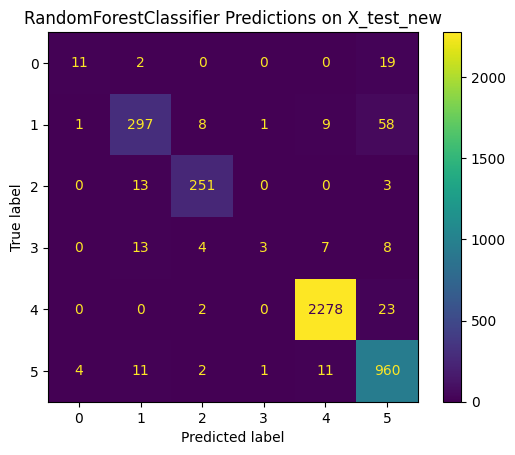

In [63]:
#Ploting Predictions on X_test_new data.
plt.figure(figsize=(8,6))
ConfusionMatrixDisplay.from_predictions(y_test_encoded,forest_tune.predict(X_test_transformed))
plt.title('RandomForestClassifier Predictions on X_test_new')
plt.show()

In [64]:
#XGBClassifier model fitting on the transformed data.
xgb_tune=XGBClassifier(objective='multi:softprob',eval_metric='auc',n_estimators=500,max_depth=None,learning_rate=0.1)
xgb_tune.fit(X_train_transformed,y_train_encoded)

#Evaluating Model Performance on the test set.
train_score=xgb_tune.score(X_train_transformed,y_train_encoded)
test_score=xgb_tune.score(X_test_transformed,y_test_encoded)
print('Train score of XGBClassifier:',train_score)
print('Test score of XGBClassifier:',test_score)

Train score of XGBClassifier: 0.99925
Test score of XGBClassifier: 0.954


In [65]:
# Evaluating Model Performance with Cross-validation.
scores=cross_val_score(xgb_tune,X_train_transformed,y_train_encoded,cv=4)
print('XGBClassifier Accuracy on Training set with crossvalidation:',scores.mean()*100,'%')

XGBClassifier Accuracy on Training set with crossvalidation: 95.11874999999999 %


<Figure size 800x600 with 0 Axes>

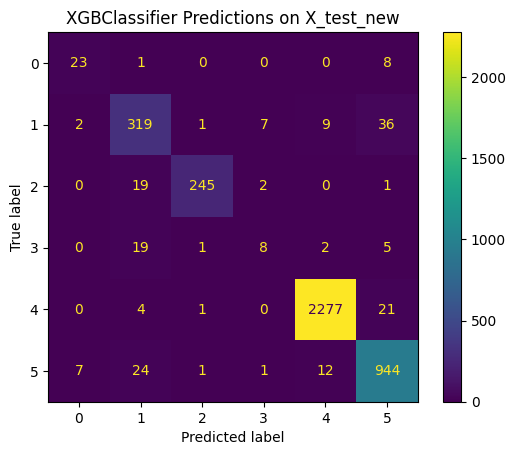

In [66]:
#Ploting Predictions on X_test_transformed data.
plt.figure(figsize=(8,6))
ConfusionMatrixDisplay.from_predictions(y_test_encoded,xgb_tune.predict(X_test_transformed))
plt.title('XGBClassifier Predictions on X_test_new')
plt.title
plt.show()

In [67]:
#BaggingClassifier fitting on the preprocessed data(all transformed features)
bag_tune=BaggingClassifier(n_estimators=50,bootstrap_features=True,random_state=42)
bag_tune.fit(X_train_transformed,y_train_encoded)

#Evaluating Model Performance on the test set.
train_score=bag_tune.score(X_train_transformed,y_train_encoded)
test_score=bag_tune.score(X_test_transformed,y_test_encoded)
print('Train score of BaggingClassifier:',train_score)
print('Test score of BaggingClassifier:',test_score)

Train score of BaggingClassifier: 1.0
Test score of BaggingClassifier: 0.947


In [68]:
# Evaluating Model Performance with Cross-validation.
scores=cross_val_score(bag_tune,X_train_transformed,y_train_encoded,cv=4)
print('BaggingClassifier Accuracy on Training set with crossvalidation:',scores.mean()*100,'%')

BaggingClassifier Accuracy on Training set with crossvalidation: 94.61874999999999 %


<Figure size 800x600 with 0 Axes>

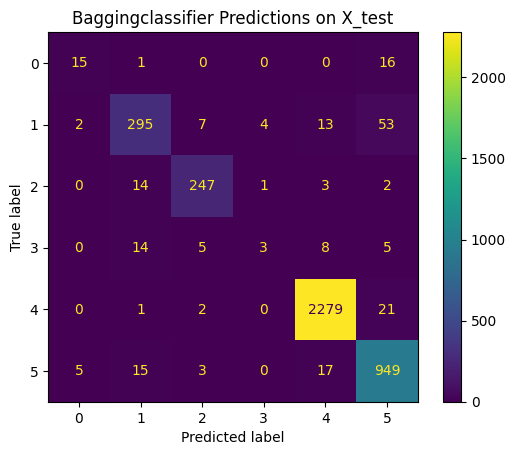

In [69]:
#Ploting Predictions on X_test data.
plt.figure(figsize=(8,6))
ConfusionMatrixDisplay.from_predictions(y_test_encoded,bag_tune.predict(X_test_transformed))
plt.title('Baggingclassifier Predictions on X_test')
plt.show()

# Comparing Training and Testing Accuracies of best 3 models.

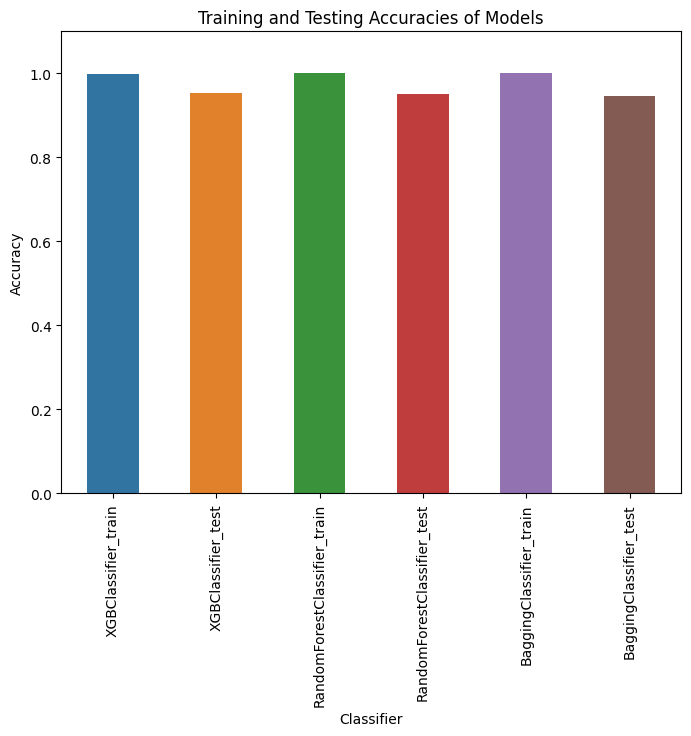

In [70]:
# Sorting scores based on the testing accuries.
clf=['XGBClassifier_train','XGBClassifier_test','RandomForestClassifier_train','RandomForestClassifier_test','BaggingClassifier_train','BaggingClassifier_test']
scores=[0.999,0.954,1.0,0.950,1.0,0.947]
# Create a DataFrame
data = pd.DataFrame({'Classifier': clf,'Accuracy': scores})

# Plotting a bar graph.
plt.figure(figsize=(8, 6))
sns.barplot(x='Classifier', y='Accuracy', data=data,width=0.5)
plt.ylim(0, 1.1)  # Set y-axis limit for better visualization
plt.title('Training and Testing Accuracies of Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.show()


# Making Submission with best model on test data.

In [71]:
predictions=xgb_tune.predict(test_transformed)
predictions_inverse=encoder.inverse_transform(predictions.reshape(-1,1))
submission=pd.DataFrame({'ID':np.arange(1,5001),'predictions':predictions_inverse.flatten()})
submission.to_csv('submission.csv',index=False)